In [0]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

(60000, 28, 28, 1)
[5 0 4 ... 5 6 8]


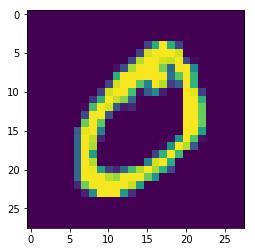

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

# print(x_train.shape)
# print(len(x_train))
# print(x_train.shape)
# print(x_test.shape)
# print(len(x_test.shape))
image_size = 28


plt.imshow(x_train[1])

x_train = np.reshape(x_train, [-1, image_size, image_size, 1])#changing to (n, 28,28,1)
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print((x_train.shape))

# print(np.unique(y_train))
# print(np.unique(y_test))#to print no. of classes

print(y_train)

from keras.utils import np_utils #onehotencoder

y_train = np_utils.to_categorical(y_train).astype('int32')#same functionality as onehotencoder
y_test = np_utils.to_categorical(y_test)

# for layer in model.layers:
#   print(layer.get_config(), layer.get_weights()) # to freeze the layer weight 

In [0]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
#functional keras model

inputLr = Input(shape = (28,28,1))

X1 = Conv2D(64,(3,3), activation = "relu")(inputLr)
X1 = MaxPooling2D(pool_size = (2,2))(X1)

X2 = Conv2D(32,(3,3), activation = "relu")(X1)
X2 = MaxPooling2D(pool_size = (2,2))(X2)
X2 = Flatten()(X2)

X3 = Dense(128, activation  = "relu")(X2)
OutLr = Dense(10, activation  = "softmax")(X3) 

model = Model(inputs = inputLr, outputs = OutLr)

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               102528    
__________

In [0]:
model.compile(optimizer = "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
model.fit(x_train, y_train, epochs = 10,validation_data=(x_test, y_test), batch_size = 256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3100 - acc: 0.9123 - val_loss: 0.0847 - val_acc: 0.9745
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0754 - acc: 0.9764 - val_loss: 0.0567 - val_acc: 0.9806
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0535 - acc: 0.9829 - val_loss: 0.0443 - val_acc: 0.9848
Epoch 4/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0414 - acc: 0.9873 - val_loss: 0.0364 - val_acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0328 - acc: 0.9898 - val_loss: 0.0367 - val_acc: 0.9867
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0290 - acc: 0.9912 - val_loss: 0.0326 - val_acc: 0.9888
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0243 - acc: 0.9924 - val_loss: 0.0318 - val_acc

In [0]:

# y =  model.predict(x_test[0].reshape([1,28,28,1])) 
# d = x_test[0].reshape(28,28)
# plt.figure(figsize = (5,5))
# plt.imshow(d)
# print(y)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.preprocessing import image
train_path = '/content/drive/My Drive/faces94/TLDB/TLDB/Priyesh/Train/'
test_path = '/content/drive/My Drive/faces94/TLDB/TLDB/Priyesh/Test/'

In [0]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    #print(tva)
    return tva


result=[]
import numpy as np
import glob
files=(glob.glob(train_path+"/*.png")) #to list names of all the files inside given folder; i.e. relative path
n=len(files);
    
for indx in range(n):
        x=[imageprepare(files[indx])]#file path here
        newArr=[[0 for d in range(28)] for y in range(28)]
        k = 0
        for i in range(28):
            for j in range(28):
                newArr[i][j]=x[0][k]
                k=k+1
        result.append(newArr)
x_npa=np.asarray(result) # converting to NP ARRAY of size (n,28,28)
#     return x_npa
    



(20, 28, 28)


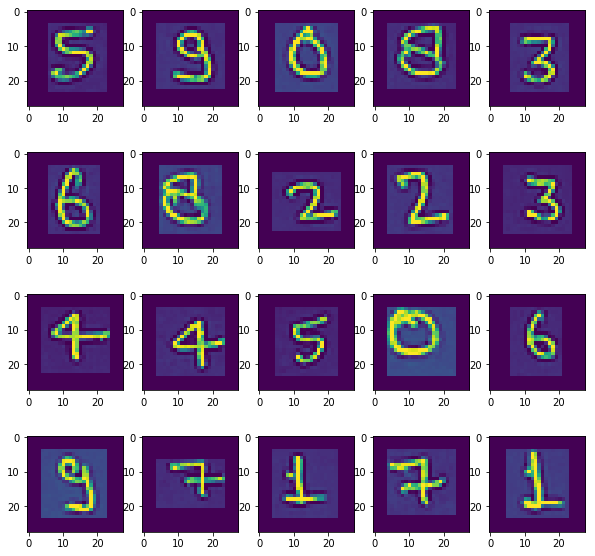

In [0]:
print(x_npa.shape)
plt.figure(figsize = (10, 10))

for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_npa[i])

In [0]:
x_train_new = x_npa#our dataset
y_train_new = np.array([5,9,0,8,3,6,8,2,2,3,4,4,5,0,6,9,7,1,7,1])
y_train_new_for_svm=y_train_new
x_train_new = x_train_new.reshape([-1,28,28,1])
# model.predict(x_train_new)

model1 = Model(inputs = model.input, outputs = model.layers[5].output) #taking only convnet features by excluding two dense layers
x_train_features=model1.predict(x_train_new)
#model1.summary()
print(x_train_features.shape)



(20, 800)


In [0]:
y_train_new = np_utils.to_categorical(y_train_new).astype('int32')#same functionality as onehotencoder


In [0]:
#for our understanding we are sending our dataset as a test dataset to find how accurate my model is.
# y1 = x_train_new[0].reshape(-1,28,28,1)
y = model.predict(x_train_new)
result1 = []

for i in range(20):
  result1.append(np.where(y[i] == np.amax(y[i])))
    
    
print(result1)

[(array([9]),), (array([9]),), (array([0]),), (array([9]),), (array([3]),), (array([6]),), (array([9]),), (array([2]),), (array([2]),), (array([3]),), (array([8]),), (array([4]),), (array([9]),), (array([9]),), (array([6]),), (array([9]),), (array([3]),), (array([4]),), (array([7]),), (array([1]),)]


In [0]:
from keras.models import Sequential


newmodel = Sequential()
newmodel.add(Dense(units = 128,input_shape = (800,),activation = "relu"))
newmodel.add(Dense(units = 10, activation = "softmax"))
newmodel.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 103,818
Trainable params: 103,818
Non-trainable params: 0
_________________________________________________________________


In [0]:
result=[]
import numpy as np
import glob
files=(glob.glob(test_path+"/*.png")) #to list names of all the files inside given folder; i.e. relative path
n=len(files);
    
for indx in range(n):
        x=[imageprepare(files[indx])]#file path here
        newArr=[[0 for d in range(28)] for y in range(28)]
        k = 0
        for i in range(28):
            for j in range(28):
                newArr[i][j]=x[0][k]
                k=k+1
        result.append(newArr)
x_npa1=np.asarray(result) # converting to NP ARRAY of size (n,28,28)


In [0]:
print(x_npa1.shape)
# plt.figure(figsize = (10, 10))
# for i in range(20):
#   plt.subplot(4,5,i+1)
#   plt.imshow(x_npa1[i])
             
x_test_new = x_npa1
x_test_new = x_test_new.reshape([-1,28,28,1])

y_test_new = np.array([9,2,2,8,3,5,0,8,1,7,3,7,4,5,0,6,6,1,9,4])
y_test_new_for_svm=y_test_new
print(y_test_new)

x_test_features =model1.predict(x_test_new)
y_test_new = np_utils.to_categorical(y_test_new).astype('int32')

print(x_train_features.shape)

(20, 28, 28)
[9 2 2 8 3 5 0 8 1 7 3 7 4 5 0 6 6 1 9 4]
(20, 800)


In [0]:
newmodel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])
newmodel.fit(x_train_features,
                y_train_new,
             epochs=20,
                validation_data=(x_test_features, y_test_new),
                batch_size=5
            )

Train on 20 samples, validate on 20 samples
Epoch 1/20
20/20 [==============================] - 1s 46ms/step - loss: 2.7007 - acc: 0.1000 - val_loss: 2.1396 - val_acc: 0.3000
Epoch 2/20
20/20 [==============================] - 0s 1ms/step - loss: 1.5811 - acc: 0.6000 - val_loss: 1.8911 - val_acc: 0.3500
Epoch 3/20
20/20 [==============================] - 0s 1ms/step - loss: 0.9299 - acc: 0.9500 - val_loss: 1.6735 - val_acc: 0.6500
Epoch 4/20
20/20 [==============================] - 0s 1ms/step - loss: 0.5439 - acc: 1.0000 - val_loss: 1.4909 - val_acc: 0.6000
Epoch 5/20
20/20 [==============================] - 0s 1ms/step - loss: 0.3061 - acc: 1.0000 - val_loss: 1.4153 - val_acc: 0.5500
Epoch 6/20
20/20 [==============================] - 0s 1ms/step - loss: 0.1751 - acc: 1.0000 - val_loss: 1.3529 - val_acc: 0.6000
Epoch 7/20
20/20 [==============================] - 0s 997us/step - loss: 0.1032 - acc: 1.0000 - val_loss: 1.2982 - val_acc: 0.6500
Epoch 8/20
20/20 [=========================

In [0]:
y1 = newmodel.predict(x_test_features)
result1 = []

for i in range(20):
  result1.append(np.where(y1[i] == np.amax(y1[i])))
    
    
print(result1)

[(array([0]),), (array([2]),), (array([2]),), (array([0]),), (array([3]),), (array([1]),), (array([8]),), (array([8]),), (array([1]),), (array([4]),), (array([3]),), (array([7]),), (array([4]),), (array([5]),), (array([0]),), (array([6]),), (array([6]),), (array([9]),), (array([9]),), (array([4]),)]


In [0]:
#pretrained_model= convnet , and new_model=svm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
print(x_train_features.shape)

classifier.fit(x_train_features, y_train_new_for_svm)

(20, 800)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_by_svm=classifier.predict(x_test_features)
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test_new_for_svm,y_pred_by_svm)

In [0]:
print(cn)

[[0 0 0 0 0 0 1 0 1 0]
 [0 1 0 0 1 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 1 0]]
